In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [3]:
df_train= pd.read_csv('/content/cleaned_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [45]:
# TABLE: Passenger counts by class and sex
# Shows representation before talking about survival


group_counts = df_train.groupby(["Pclass", "Sex"]).size().unstack()

# make it cleaner to read
group_counts = group_counts.rename(index={
    1: "1st Class",
    2: "2nd Class",
    3: "3rd Class"
})

group_counts.index.name = "Passenger Class"
group_counts.columns.name = None

print("Passenger Counts by Class and Sex")
print("-----------------------------------")
print(group_counts)

Passenger Counts by Class and Sex
-----------------------------------
                 female  male
Passenger Class              
1st Class            94   122
2nd Class            76   108
3rd Class           144   347


### ACCURATE VISUALIZATION

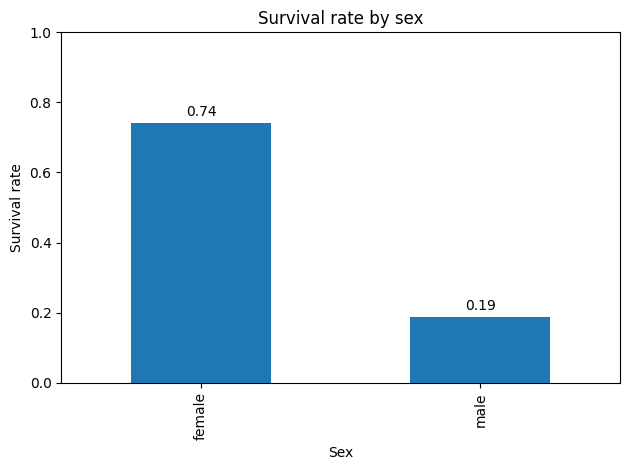

In [34]:
# ACCURATE VISUALIZATION
# Survival rate by sex
survival_by_sex = df_train.groupby("Sex")["Survived"].mean().sort_values(ascending=False)

ax = survival_by_sex.plot(kind="bar")
ax.set_title("Survival rate by sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Survival rate")
ax.set_ylim(0, 1)

# displaying the actual value of survival on bar head
for i, v in enumerate(survival_by_sex.values):
    ax.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.tight_layout()
plt.show()


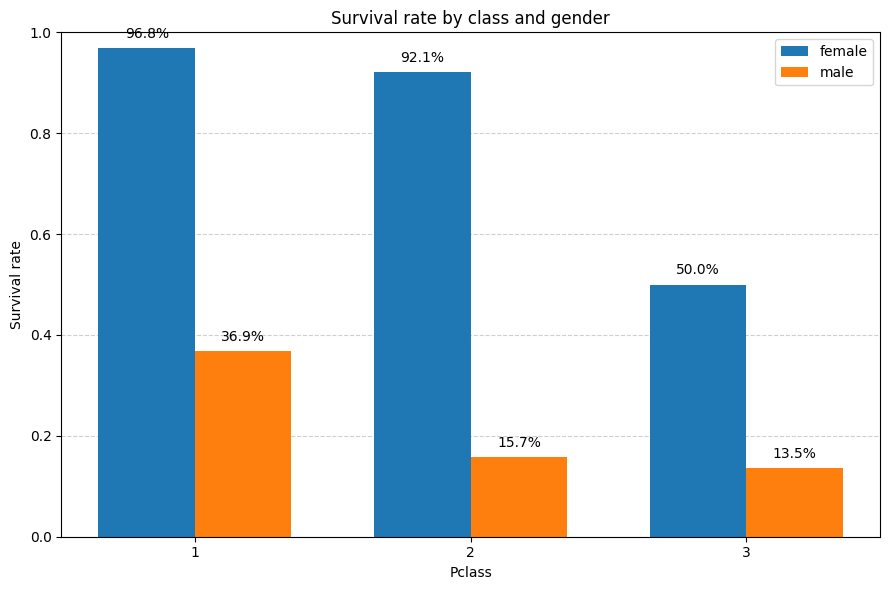

In [40]:
# Intersection view, survival rate by class and sex
surv_by_class_sex = (
    df_train.groupby(["Pclass", "Sex"])["Survived"]
    .mean()
    .reset_index()
)

classes = sorted(df_train["Pclass"].unique())
sexes = ["female", "male"]

x = np.arange(len(classes))
width = 0.35

female_rates = []
male_rates = []

for c in classes:
    female_rates.append(
        surv_by_class_sex[
            (surv_by_class_sex["Pclass"] == c) &
            (surv_by_class_sex["Sex"] == "female")
        ]["Survived"].values[0]
    )
    male_rates.append(
        surv_by_class_sex[
            (surv_by_class_sex["Pclass"] == c) &
            (surv_by_class_sex["Sex"] == "male")
        ]["Survived"].values[0]
    )

fig, ax = plt.subplots(figsize=(9, 6))

bars_f = ax.bar(x - width/2, female_rates, width, label="female")
bars_m = ax.bar(x + width/2, male_rates, width, label="male")

# add percentage labels on top
for bar in bars_f:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.02,
        f"{h*100:.1f}%",
        ha="center"
    )

for bar in bars_m:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.02,
        f"{h*100:.1f}%",
        ha="center"
    )

ax.set_title("Survival rate by class and gender")
ax.set_xlabel("Pclass")
ax.set_ylabel("Survival rate")
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)

# dashed horizontal grid lines
ax.yaxis.grid(True, linestyle="--", alpha=0.6)
ax.set_axisbelow(True)

ax.legend()

plt.tight_layout()
plt.show()

## MISLEADING VISUALS

#### Misleading survival counts

This chart can push the agenda that "men did worse" without saying it is mostly because there were more men than women onboard.


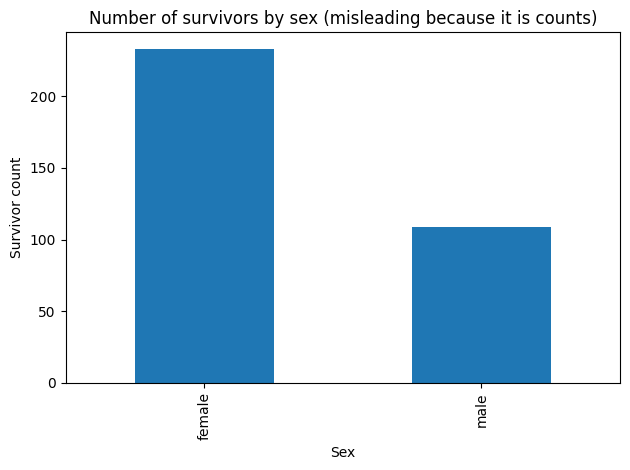

In [11]:

# Use raw survivor counts by sex (ignores how many were onboard)
survivor_counts = df_train[df_train["Survived"] == 1].groupby("Sex").size().sort_values(ascending=False)

ax = survivor_counts.plot(kind="bar")
ax.set_title("Number of survivors by sex (misleading because it is counts)")
ax.set_xlabel("Sex")
ax.set_ylabel("Survivor count")
plt.tight_layout()
plt.show()


In [50]:

# Calculate and display survivor counts by gender
survivor_counts_by_gender = df_train[df_train["Survived"] == 1].groupby("Sex").size().sort_values(ascending=False)
print("Survivor Counts by Gender:", survivor_counts_by_gender)



Survivor Counts by Gender: Sex
female    233
male      109
dtype: int64


### Misleading Visualizations

**Raws Counts and Wrong Coloro Encoding**



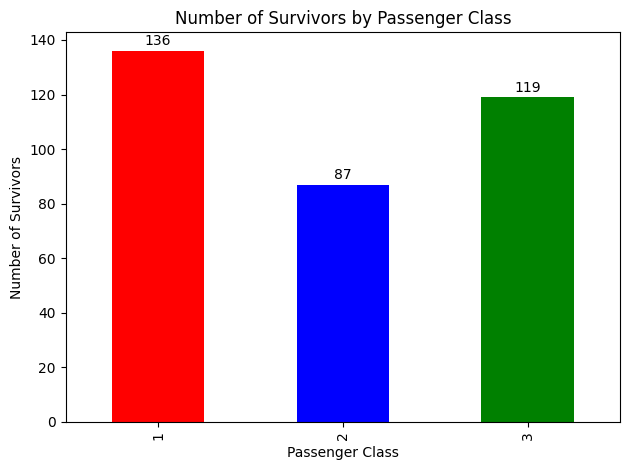

In [21]:

# get only survivors
survivors = df_train[df_train["Survived"] == 1]
# count survivors by class
survivor_counts = survivors.groupby("Pclass").size().sort_index()

# declaring color variable
colors = ['red', 'blue', 'green']

# plot counts only
ax = survivor_counts.plot(kind="bar")

# Set colors for each bar after plotting
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

ax.set_title("Number of Survivors by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Number of Survivors")

# add counts numbers labels on top
for i, v in enumerate(survivor_counts.values):
    ax.text(i, v + 2, str(v), ha="center")

plt.tight_layout()
plt.show()

In [17]:
# total passengers by class
total_by_class = df_train.groupby("Pclass").size().sort_index()

print("\nTotal passengers by class:")
print(total_by_class)

print("\nRatio of 3rd class to 1st class passengers:")
ratio = total_by_class[3] / total_by_class[1]
print(round(ratio, 2), "times more passengers in 3rd class")


Total passengers by class:
Pclass
1    216
2    184
3    491
dtype: int64

Ratio of 3rd class to 1st class passengers:
2.27 times more passengers in 3rd class


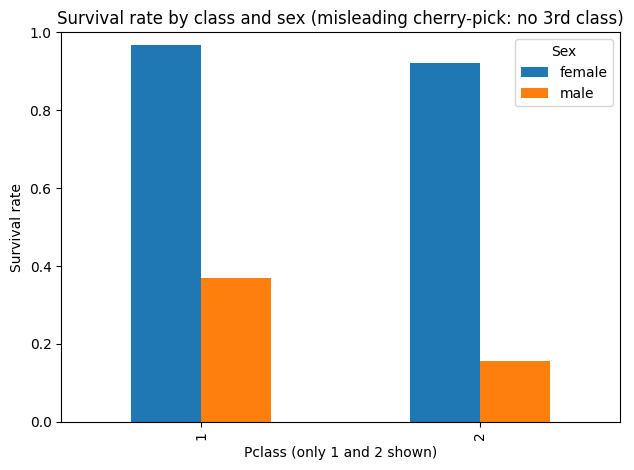

In [46]:
# Cherry pick the data, remove 3rd class
# ----------------------------
# This can make it look like the class gap was not that serious.
picked = df_train[df_train["Pclass"].isin([1, 2])].copy()
picked_rates = picked.groupby(["Pclass", "Sex"])["Survived"].mean().unstack()

ax = picked_rates.plot(kind="bar")
ax.set_title("Survival rate by class and sex (misleading cherry-pick: no 3rd class)")
ax.set_xlabel("Pclass (only 1 and 2 shown)")
ax.set_ylabel("Survival rate")
ax.set_ylim(0, 1)
ax.legend(title="Sex")
plt.tight_layout()
plt.show()

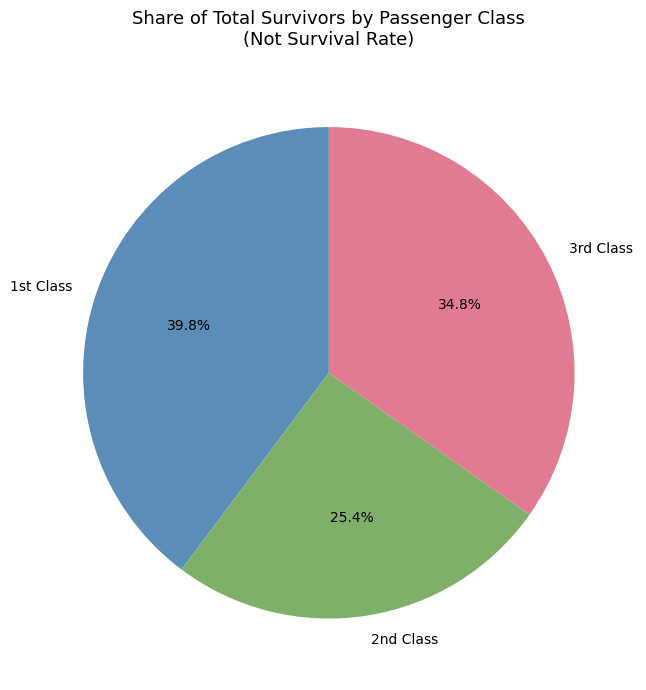

In [53]:
# MISLEADING VIZ: Pie chart of survivor share by class
# Shows share of total survivors, NOT survival rate
survivors = df_train[df_train["Survived"] == 1]

surv_counts = survivors.groupby("Pclass").size()

classes = [1, 2, 3]
labels = ["1st Class", "2nd Class", "3rd Class"]

counts = []
for c in classes:
    counts.append(surv_counts[c])

fig, ax = plt.subplots(figsize=(7, 7))

colors = ["#5B8DB8", "#7FB069", "#E07B91"]

ax.pie(counts,labels=labels,autopct="%1.1f%%",startangle=90,colors=colors)

ax.set_title("Share of Total Survivors by Passenger Class",fontsize=13,pad=15)

plt.tight_layout()
plt.show()

In [54]:
# showing the probability of survival

survival_table = df_train.groupby("Pclass")["Survived"].mean().reset_index()
survival_table["Survival_Rate_%"] = survival_table["Survived"] * 100

survival_table = survival_table.drop(columns=["Survived"])

survival_table["Pclass"] = survival_table["Pclass"].map({
    1: "1st Class",
    2: "2nd Class",
    3: "3rd Class"
})

survival_table

,Pclass,Survival_Rate_%
0,1st Class,62.962963
1,2nd Class,47.282609
2,3rd Class,24.236253
